# Importing CSV Files and saving in data folder

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is '/Users/ahmedfathi/Downloads/'



In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = "/Users/ahmedfathi/Downloads/Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == "YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'/Users/ahmedfathi/Downloads/Crimes_-_2001_to_Present.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [5]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744317,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7744318,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7744319,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7744320,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [6]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [7]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1316324,G002222,01/01/2001 01:00:00 PM,059XX W ARTHINGTON ST,0810,THEFT,OVER $500,STREET,False,False,1513,15.00,NaN,NaN,06,"1,136,610.00","1,895,353.00",2001,08/17/2015 03:03:40 PM,41.87,-87.77,"(41.869008134, -87.77394715)"
2001-01-01 01:00:00,1311626,G001009,01/01/2001 01:00:00 AM,023XX S TROY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,NaN,14,"1,155,692.00","1,888,116.00",2001,08/17/2015 03:03:40 PM,41.85,-87.70,"(41.848786421, -87.704086603)"
2001-01-01 01:00:00,1584605,G351833,01/01/2001 01:00:00 AM,024XX W CORTLAND ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.00,NaN,NaN,26,"1,159,701.00","1,912,508.00",2001,08/17/2015 03:03:40 PM,41.92,-87.69,"(41.915638736, -87.688700749)"
2001-01-01 01:00:00,1328315,G020979,01/01/2001 01:00:00 AM,067XX S JUSTINE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,NaN,11,"1,167,126.00","1,859,954.00",2001,08/17/2015 03:03:40 PM,41.77,-87.66,"(41.771269195, -87.662929135)"
2001-01-01 01:00:00,1315701,G003835,01/01/2001 01:00:00 PM,011XX S PULASKI RD,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,NaN,04B,"1,149,936.00","1,894,501.00",2001,08/17/2015 03:03:40 PM,41.87,-87.73,"(41.866421432, -87.72504577)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22 12:50:00,12990273,JG161395,02/22/2023 12:50:00 AM,003XX W MONTROSE HARBOR DR,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1915,19.00,46.00,3.00,15,"1,174,133.00","1,929,342.00",2023,03/01/2023 03:48:50 PM,41.96,-87.64,"(41.961521895, -87.635175446)"
2023-02-22 12:50:00,12992297,JG161855,02/22/2023 12:50:00 PM,046XX S LAFLIN ST,4651,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER NEW ADDRESS,APARTMENT,False,False,924,9.00,15.00,61.00,26,"1,167,115.00","1,874,007.00",2023,03/01/2023 03:48:50 PM,41.81,-87.66,"(41.809832554, -87.662567546)"
2023-02-22 12:54:00,12990326,JG161430,02/22/2023 12:54:00 AM,013XX W COLUMBIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2432,24.00,49.00,1.00,14,"1,166,106.00","1,944,933.00",2023,03/01/2023 03:48:50 PM,42.00,-87.66,"(42.004479725, -87.664239187)"


In [8]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

### Separate the Full Dataset by Years

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()


2002    486800
2001    485872
2003    475979
2004    469420
2005    453768
2006    448174
2007    437081
2008    427159
2009    392816
2010    370492
2011    351959
2012    336259
2013    307460
2014    275724
2016    269777
2017    269044
2018    268744
2015    264736
2019    261213
2022    237113
2020    212039
2021    208427
2023     34266
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.00,NaN,2001,41.87,-87.77
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,2001,41.85,-87.70
2001-01-01 01:00:00,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.00,NaN,2001,41.92,-87.69
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66
2001-01-01 01:00:00,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,2001,41.87,-87.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22 12:50:00,12990273,02/22/2023 12:50:00 AM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1915,19.00,46.00,2023,41.96,-87.64
2023-02-22 12:50:00,12992297,02/22/2023 12:50:00 PM,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER NEW ADDRESS,APARTMENT,False,False,924,9.00,15.00,2023,41.81,-87.66
2023-02-22 12:54:00,12990326,02/22/2023 12:54:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2432,24.00,49.00,2023,42.00,-87.66


In [12]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7744322 entries, 2001-01-01 01:00:00 to 2023-02-22 12:56:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 723.8+ MB


In [13]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   61,954,576.00
ID                      61,954,576.00
Date                   611,801,438.00
Primary Type           519,106,897.00
Description            566,784,871.00
Location Description   527,827,362.00
Arrest                   7,744,322.00
Domestic                 7,744,322.00
Beat                    61,954,576.00
District                61,954,576.00
Ward                    61,954,576.00
Year                   472,403,642.00
Latitude                61,954,576.00
Longitude               61,954,576.00
dtype: float64

In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [15]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [16]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [17]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [18]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [19]:
# loading the saved csv files
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.00,NaN,41.87,-87.77
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,41.85,-87.70
2,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.00,NaN,41.92,-87.69
3,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,41.77,-87.66
4,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,41.87,-87.73
...,...,...,...,...,...,...,...,...,...,...,...,...
34261,12990273,02/22/2023 12:50:00 AM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1915,19.00,46.00,41.96,-87.64
34262,12992297,02/22/2023 12:50:00 PM,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER NEW ADDRESS,APARTMENT,False,False,924,9.00,15.00,41.81,-87.66
34263,12990326,02/22/2023 12:54:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2432,24.00,49.00,42.00,-87.66
34264,12990251,02/22/2023 12:54:00 AM,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,False,False,2223,22.00,21.00,41.72,-87.64


# Answering Stakeholder questions

## Importing Libraries

### Confirmation of saved files

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import os,glob

import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize'] = [10,5]

In [21]:
# chicago_final already has datetime as the index so we can skip this step
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7744322 entries, 2001-01-01 01:00:00 to 2023-02-22 12:56:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 723.8+ MB


### Q1: ) Comparing Police Districts:
- Which district has the most crimes? Which has the least?

In [22]:
# Looking through the values for each district
chicago_final['District'].value_counts()

8.00     520648
11.00    497433
6.00     452660
7.00     448623
25.00    440727
4.00     439718
3.00     392798
12.00    383209
9.00     378632
2.00     366421
19.00    347361
18.00    347269
5.00     343421
10.00    333642
15.00    332425
1.00     312420
14.00    299813
16.00    258917
22.00    253817
24.00    233782
17.00    223493
20.00    136810
31.00       232
21.00         4
Name: District, dtype: int64

#### District 8 has the most crimes and district 21 has the least amount of crimes

### Q2: Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [23]:
# Pulling only the years and all of the crimes attached to each year
chicago_final['years'] = chicago_final['Date'].map(lambda x: x.split()[0].split('/')[-1])
chicago_final['years'].value_counts().sort_index()

2001    485872
2002    486800
2003    475979
2004    469420
2005    453768
2006    448174
2007    437081
2008    427159
2009    392816
2010    370492
2011    351959
2012    336259
2013    307460
2014    275724
2015    264736
2016    269777
2017    269044
2018    268744
2019    261213
2020    212039
2021    208427
2022    237113
2023     34266
Name: years, dtype: int64

#### We can see that the number of crimes decreased as years went on.

In [44]:
# Adding count column to df
chicago_final['Count'] = 1

In [45]:
# Resample the data as annual 
cf_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
cf_year

/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cf_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cf_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a f

/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cf_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cf_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Count'].reset_index()
/var/folders/_6/ckz2728133lc1qzjc15hm2nw0000gn/T/ipykernel_52143/1227408808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a f

,Primary Type,Datetime,Count
0,ARSON,2001-12-31,1011
1,ARSON,2002-12-31,1032
2,ARSON,2003-12-31,955
3,ARSON,2004-12-31,778
4,ARSON,2005-12-31,691
...,...,...,...
747,WEAPONS VIOLATION,2019-12-31,6339
748,WEAPONS VIOLATION,2020-12-31,8431
749,WEAPONS VIOLATION,2021-12-31,8978
750,WEAPONS VIOLATION,2022-12-31,8726


In [48]:
# Pivoting to have datetime as the index and crime as columns
years_cf = cf_year.pivot(index='Datetime',columns='Primary Type')
years_cf

Count                                \
Primary Type    ARSON   ASSAULT   BATTERY  BURGLARY   
Datetime                                              
2001-12-31   1,011.00 31,384.00 93,460.00 26,014.00   
2002-12-31   1,032.00 31,523.00 94,153.00 25,623.00   
2003-12-31     955.00 29,477.00 88,379.00 25,156.00   
2004-12-31     778.00 28,850.00 87,136.00 24,564.00   
2005-12-31     691.00 27,066.00 83,964.00 25,503.00   
2006-12-31     726.00 25,945.00 80,666.00 24,324.00   
2007-12-31     712.00 26,313.00 79,593.00 24,858.00   
2008-12-31     644.00 25,449.00 75,926.00 26,218.00   
2009-12-31     616.00 22,861.00 68,460.00 26,767.00   
2010-12-31     522.00 21,537.00 65,402.00 26,422.00   
2011-12-31     504.00 20,411.00 60,459.00 26,620.00   
2012-12-31     469.00 19,899.00 59,135.00 22,845.00   
2013-12-31     364.00 17,972.00 54,006.00 17,895.00   
2014-12-31     397.00 16,903.00 49,450.00 14,569.00   
2015-12-31     453.00 17,048.00 48,923.00 13,184.00   
2016-12-31     516.00 18,742.00 50,299.00 14,289.00   
2017-12-31     444.00 19,306.00 49,238.00 13,001.00   
2018-12-31     373.00 20,406.00 49,828.00 11,746.00   
2019-12-31     376.00 20,620.00 49,513.00  9,639.00   
2020-12-31     589.00 18,254.00 41,510.00  8,757.00   
2021-12-31     527.00 20,339.00 40,452.00  6,658.00   
2022-12-31     424.00 20,760.00 40,850.00  7,592.00   
2023-12-31      74.00  2,808.00  5,520.00  1,067.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                1.00            1,779.00   
2002-12-31                                0.00            1,807.00   
2003-12-31                                0.00            1,572.00   
2004-12-31                                0.00            1,545.00   
2005-12-31                                0.00            1,526.00   
2006-12-31                                0.00            1,440.00   
2007-12-31                                0.00            1,508.00   
2008-12-31                                0.00            1,517.00   
2009-12-31                                0.00            1,405.00   
2010-12-31                                0.00            1,341.00   
2011-12-31                                0.00            1,463.00   
2012-12-31                                0.00            1,399.00   
2013-12-31                                0.00            1,277.00   
2014-12-31                               15.00            1,318.00   
2015-12-31                               34.00            1,355.00   
2016-12-31                               36.00            1,502.00   
2017-12-31                               69.00            1,513.00   
2018-12-31                              149.00            1,406.00   
2019-12-31                              217.00              913.00   
2020-12-31                              148.00               75.00   
2021-12-31                              173.00                 NaN   
2022-12-31                              177.00                 NaN   
2023-12-31                               27.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31         55,857.00                   30.00         13,241.00   
2002-12-31         55,941.00                   27.00         13,880.00   
2003-12-31         55,011.00                   39.00         14,807.00   
2004-12-31         53,164.00                   35.00         15,913.00   
2005-12-31         54,548.00                   31.00         16,655.00   
2006-12-31         57,124.00                   46.00         14,505.00   
2007-12-31         53,749.00                   51.00         13,699.00   
2008-12-31         52,84

In [52]:
### Substracting to get the number of crimes between all years
delta_crime_yrs = years_cf.loc['2022-12-31'] - years_cf.loc['2001-12-31']
delta_crime_yrs

       Primary Type                     
Count  ARSON                                  -587.00
       ASSAULT                             -10,624.00
       BATTERY                             -52,610.00
       BURGLARY                            -18,422.00
       CONCEALED CARRY LICENSE VIOLATION       176.00
       CRIM SEXUAL ASSAULT                        NaN
       CRIMINAL DAMAGE                     -28,637.00
       CRIMINAL SEXUAL ASSAULT               1,514.00
       CRIMINAL TRESPASS                    -9,024.00
       DECEPTIVE PRACTICE                      812.00
       DOMESTIC VIOLENCE                          NaN
       GAMBLING                               -925.00
       HOMICIDE                                 51.00
       HUMAN TRAFFICKING                          NaN
       INTERFERENCE WITH PUBLIC OFFICER        -15.00
       INTIMIDATION                           -100.00
       KIDNAPPING                             -817.00
       LIQUOR LAW VIOLATION              

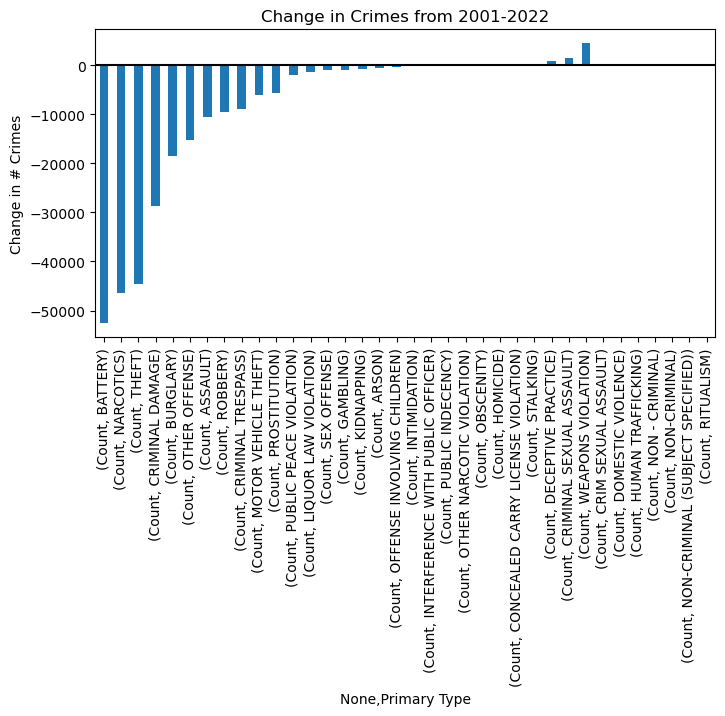

In [53]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2022')
ax.axhline(0,color='k');

#### While overall crime decreased, weapons violation, criminal sexual assault, and deceptive practices are some of the crimes that increased over time

### Q3: Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [57]:
# Creating date and month columns in df
chicago_final['Date'] = pd.to_datetime(chicago_final['Date'])
chicago_final['Month'] = chicago_final['Date'].dt.month_name()

In [58]:
# Count the number of incidents per month
monthly_counts = chicago_final.groupby('Month').size().reset_index(name='Counts')

In [59]:
monthly_counts.value_counts()

Month      Counts
April      626950    1
August     710143    1
December   579401    1
February   543016    1
January    621470    1
July       716977    1
June       681499    1
March      629513    1
May        682728    1
November   608684    1
October    676010    1
September  667931    1
dtype: int64

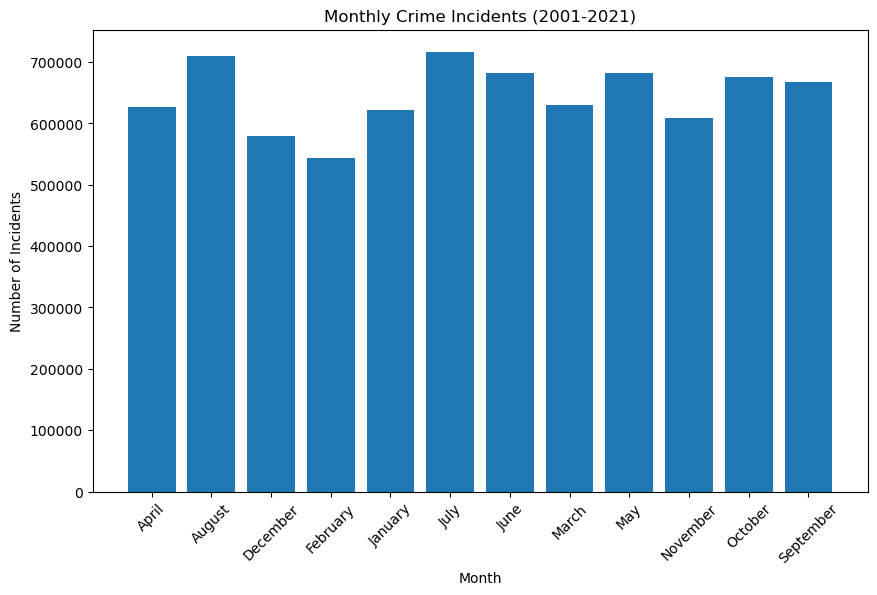

In [62]:
# Create a bar plot of the monthly counts
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_counts['Month'], monthly_counts['Counts'])

# Set the plot title and axis labels
ax.set_title('Monthly Crime Incidents (2001-2021)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [61]:
# Count the number of incidents per crime type
crime_counts = chicago_final.groupby('Primary Type').size().reset_index(name='Counts')

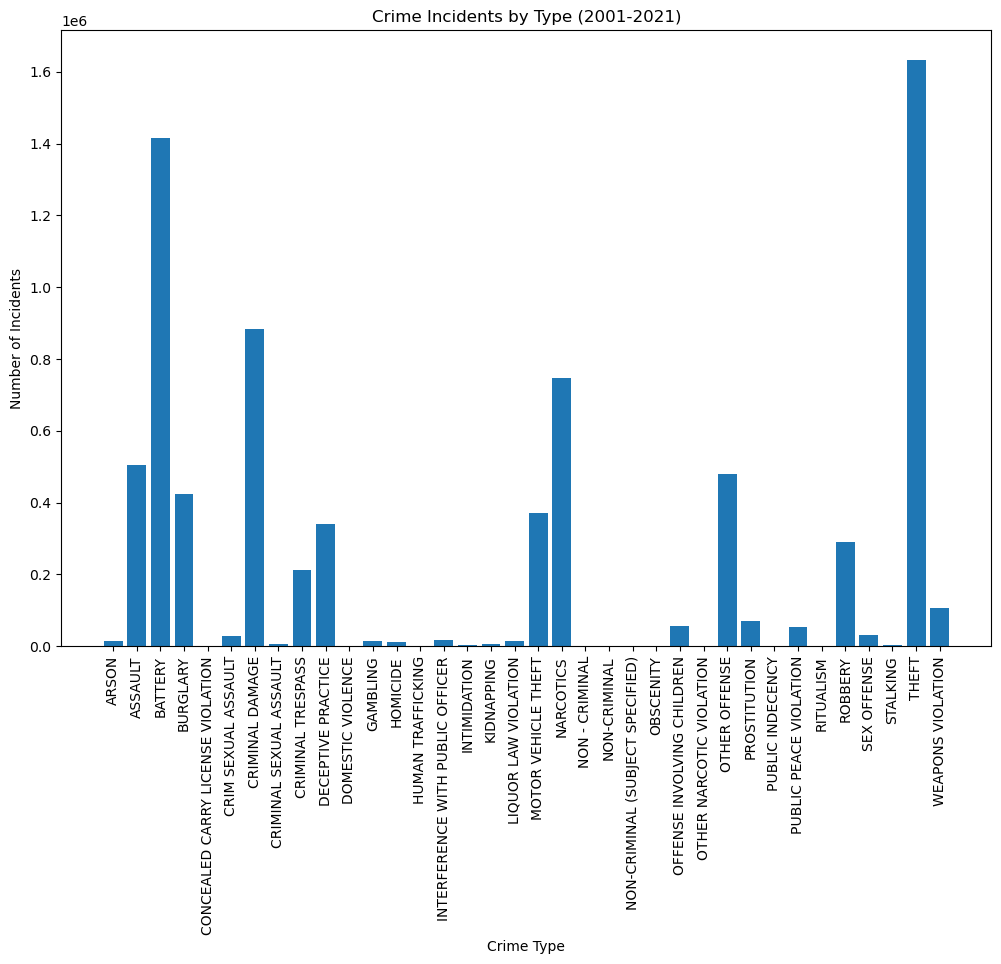

In [63]:
# Create a bar plot of the crime counts
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(crime_counts['Primary Type'], crime_counts['Counts'])

# Set the plot title and axis labels
ax.set_title('Crime Incidents by Type (2001-2021)')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Incidents')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### From the two viz, we can see that July and August have the most crime and February has the least number of crimes. Also based on the types of crimes, we can see that Theft and Battery both have increased incidences most likely in the summer.